In [3]:
import pandas as pd

In [4]:
# Reference: Import data from Yahoo Finance - https://finance.yahoo.com/quote/CSV/history/?guccounter=1&period1=1356998400&period2=1703980800
# Asset name: Carriage Services, Inc. (CSV)
# Currency: USD (United  State Dollar)
df = pd.read_csv("finance.yahoo.com 2013-2023.csv")

In [5]:
# Display the count of columns and rows
df.shape

(2768, 7)

In [6]:
# Display the records
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,11.91,13.52,11.90,13.45,11.948698,208100
1,2013-01-03,13.55,13.59,12.87,12.90,11.460092,106000
2,2013-01-04,12.99,13.25,12.48,13.22,11.744374,54800
3,2013-01-07,13.15,13.22,13.00,13.05,11.593348,33300
4,2013-01-08,13.05,13.25,12.96,13.00,11.548930,31700


In [7]:
# Display the duplicates rows
df.duplicated().sum()

0

In [8]:
# Display the missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


In [10]:
# assign only column Date and Close to our dataframe object
df = df[['Date','Close']]
df.head()

,Date,Close
0,2013-01-02,13.45
1,2013-01-03,12.90
2,2013-01-04,13.22
3,2013-01-07,13.05
4,2013-01-08,13.00


In [11]:
# Convert the 'Date' column to datetime format
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

## Visualizing Dataset

Let's visualize the close USD (dollar) price between 2013 and 2023. The code for producing this visualization is as follows:

<Figure size 1200x500 with 0 Axes>

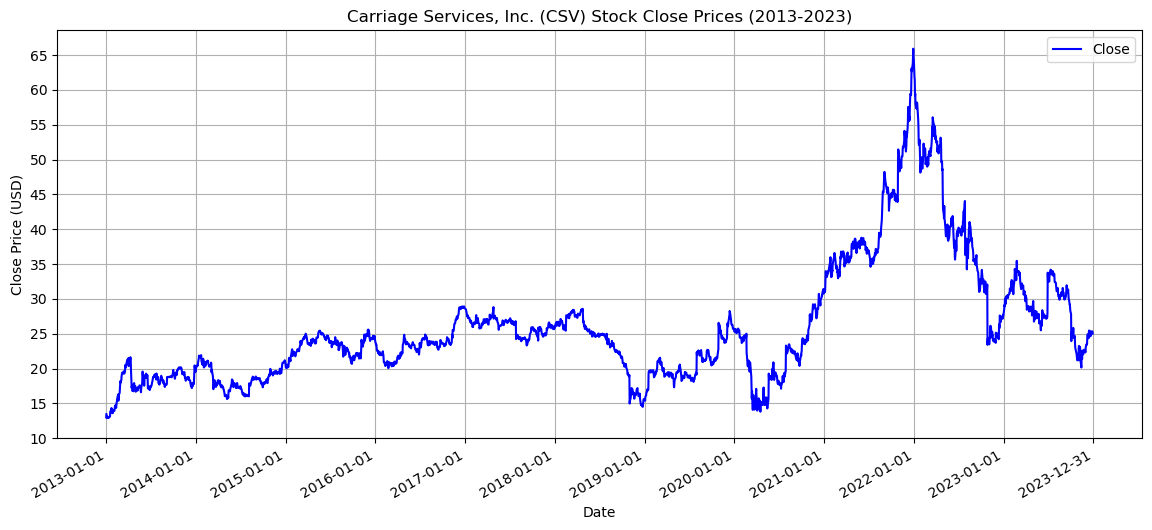

In [13]:
import matplotlib.pyplot as plt

# Visualize Carriage Services, Inc. (CSV) Stock Close Prices (2013-2023)
plt.figure(figsize=[12, 5]); # Set dimensions for figure
df.plot(figsize = (14, 6), color = 'b')   # 
plt.title('Carriage Services, Inc. (CSV) Stock Close Prices (2013-2023)')
plt.ylabel('Close Price (USD)')
plt.xlabel('Date')
plt.xticks(ticks=['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2023-12-31'])
plt.yticks(ticks=[10,15,20,25,30,35,40,45,50,55,60,65])
plt.legend()
plt.grid(axis='both')
plt.show()

## Testing the Stationarity of the Dataset

The Augmented Dickey-Fuller test can be used to test for a unit root, in other words if it has seasonal patterns.
And, is very important to know if our dataset has seasonal patterns or not because we will need to choice which model is better for our dataset between ARIMA or SARIMA.
- ARIMA has better results without seasonal patterns
- SARIMA has better results with seasonal patterns

Let try to find if our dataset has or not seasonal patterns using ADF as mentioned before.

In [14]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller test (ADF Test)
ad_fuller_result = adfuller(df['Close'])

# Display the outcome of Augmented Dicky-Fuller Test
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.1131095222776044
p-value: 0.23927597537488843


First, we have to know about p-value significance.
- if our p-value is greater than 0.05 we say it has unit root (non-stationary)
- if our p-value is less or equal than 0.05 we say it doesn't has unit root (stationary)

The presence of a unit root indicates that the time series is non-stationary, meaning its statistical properties (mean, variance) change over time, making it more challenging to model and forecast.

We can easily see p-value is greater than 0.05 and it tell us that our dataset has great chances to be seasonal patterns.

Conclusion:
- unit root = seasonal = non-stationarity = p > 0.05 = null hypothesis
- no unit root = non-seasonal = stationarity = p <= 0.05 = non-null hypothesis

Note: be carefully analysing this p-value, something we get exponential p-value as example '1.0850793453618563e-07' and it mean that our p-value is actually 0.00000010850793453618563 (p-value less than 0.05)

## Differencing

Since the p-value is large, we cannot reject the null hypothesis (also knows as unit root) and must assume that the time series is non-stationary. We commit to the first order differencing of electricity values and perform ADF test again on the dataset.

In [15]:
df['Close First Difference'] = df['Close'].diff(1)
# Shift index by desired number of periods with an optional time `freq`.

# Show first five records
df.head()

,Close,Close First Difference
Date,,
2013-01-02,13.45,NaN
2013-01-03,12.90,-0.55
2013-01-04,13.22,0.32
2013-01-07,13.05,-0.17
2013-01-08,13.00,-0.05


In [16]:
# Drop the first row of 'Close' column because It has 'NaN' value
df = df.iloc[1: , :]

# Display the first five records
df.head()

,Close,Close First Difference
Date,,
2013-01-03,12.90,-0.55
2013-01-04,13.22,0.32
2013-01-07,13.05,-0.17
2013-01-08,13.00,-0.05
2013-01-09,12.92,-0.08


In [17]:
# Augmented Dickey-Fuller test
ad_fuller_result = adfuller(df['Close First Difference'])

# Display the outcomes of Dicky Fuller test
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -53.86389272100899
p-value: 0.0


## Differenced Series 

The p-value is now less than 0.05, meaning that we can reject the null hypothesis (also knows as unit root) i.e. the time series is stationary. Next, let us visualize the differenced series.

Text(0.5, 1.0, 'First-order differences during Jan 2013-Dec 2023')

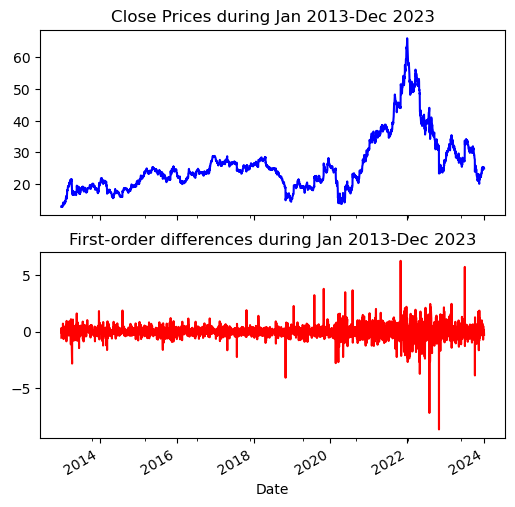

In [18]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(6, 6)
df['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close Prices during Jan 2013-Dec 2023')
df['Close First Difference'].plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences during Jan 2013-Dec 2023')

## ACF and PACF Plots

We can use the statsmodels library to build auto-correlation (ACF) and partial auto-correlation plots from the differenced series. ACF describes how well the present value of the series is related with its past values while PACF finds correlation of the residuals with the next lag value.

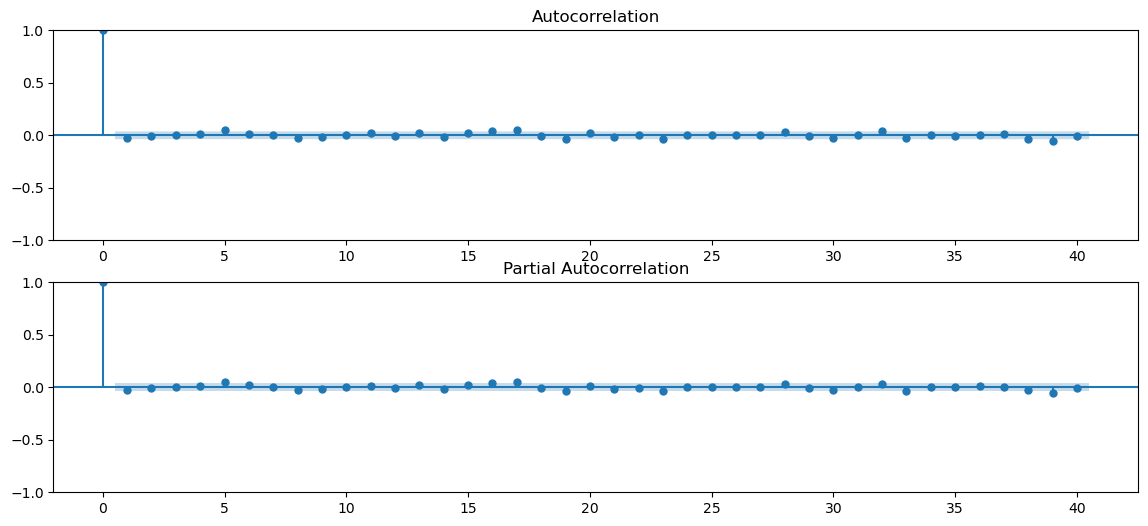

In [19]:
import statsmodels.api as sm

fig = plt.figure(figsize = (14, 6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Close First Difference'],lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Close First Difference'],lags = 40,ax = ax2)

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df['Close'], order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 5158.309051150663], [0, 1, 1, 5158.717105625994], [0, 1, 2, 5160.6965146856455], [1, 1, 0, 5158.726806522409], [1, 1, 1, 5160.701801523016], [1, 1, 2, 5162.696630786733], [2, 1, 0, 5160.696556844305], [2, 1, 1, 5160.92670456333], [2, 1, 2, 5164.696417070392], [0, 2, 0, 7139.112487023416], [0, 2, 1, 5167.258804312142], [0, 2, 2, 5167.679756313521], [1, 2, 0, 6307.281190465837], [1, 2, 1, 5167.689195713358], [1, 2, 2, 5168.807673966703], [2, 2, 0, 5972.026893891754], [2, 2, 1, 5169.663120833684], [2, 2, 2, 5171.635385419647]]


## SARIMA Model

After determining that our time series is stationary, we can use the SARIMA model to predict future values. The model's notation is SARIMA(p, d, q) (P, D, Q)lag. These three parameters account for seasonality, trend, and noise in data. We will use the AIC (Akaike information criterion) indicator which is an estimator of the relative quality of statistical models. The lower the AIC value the better. After performing multiple iterations, the model suggests that SARIMAX(2, 1, 2)x(2, 1, 2, 12) with AIC value of 11413 is the best combination.

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# order = (0, 1, 0) means 
# None for auto regressive model, 1 for difference, and none for moving average
# seasonal_order = (0, 1, 0, 51) means
# 51 additional parameter means number of observations per year or the period
best_model = SARIMAX(df['Close'], order = (0, 1, 0), seasonal_order = (0, 1, 0, 51)).fit(dis = -1)

# Display the summary of the model
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2767
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 51)   Log Likelihood               -3490.348
Date:                            Wed, 24 Apr 2024   AIC                           6982.697
Time:                                    23:21:51   BIC                           6988.603
Sample:                                         0   HQIC                          6984.832
                                           - 2767                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.7659      0.007    112.848      0.000       0.753       0.779
Ljung-Box (L1) (Q):                

* AIC: Akaikes Information Criterion: Estimator of the relative quality of statistical models for a given set of data. The AIC deals with the trade-off betwen the goodness of fit of the model and the simplicity of the model.
* BIC: Bayesian Information Criterion: Similar to the AIC, but with a larger penalty term for the number of parameters in the model.
* Hannan–Quinn information criterion (HQC) is a criterion for model selection. It is an alternative to Akaike information criterion (AIC) and Bayesian information criterion (BIC). It is given as. where. is the log-likelihood, k is the number of parameters, and n is the number of observations.

After we have fitted the model to the data, we check the residual plots to verify the validity of the model fit. A good forecasting method will have minimal information left in the residuals if any.

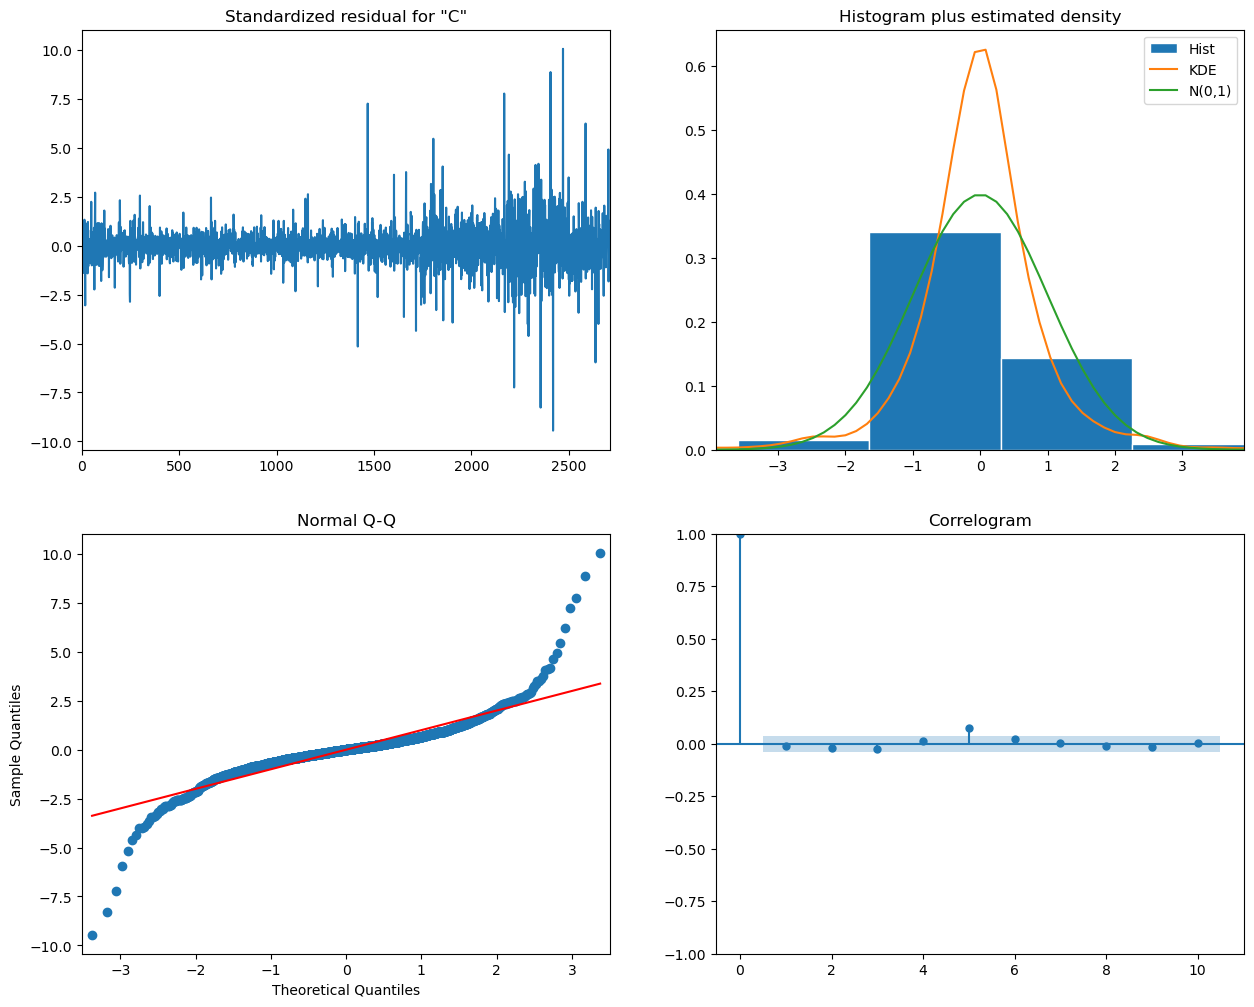

In [23]:
# Diagnosing the model residuals
best_model.plot_diagnostics(figsize = (15, 12))
plt.show()

The correlogram on the bottom right suggests that there is no autocorrelation in the residuals, and so they are effectively white noise. Therefore, these residuals are uncorrelated and have close to zero mean.